### 1) Loading dataset

* importing necessary libraries to read dataset

In [1]:
import os
import ast
import numpy as np
import pandas as pd
from PIL import Image

* setting paths for dataset files

In [2]:
# setting paths for train and test data
train_dir = "train"
train_annot_path = os.path.join(train_dir, "annotation.txt")

test_dir = "test"
test_annot_path = os.path.join(test_dir, "annotation.txt")

# setting paths for classes.txt
classes_txt_path = "classes.txt"

* getting class labels from annotation and class files

In [3]:
# getting class labels from "classes.txt"
with open(classes_txt_path) as file:
    class_map_s2i = {line.rstrip(): i for i, line in enumerate(file.readlines()) if line.rstrip()}

# Add "clutter" to the class_map_s2i
class_map_s2i["clutter"] = len(class_map_s2i)

class_map_i2s = {v: k for k, v in class_map_s2i.items()}

# getting labels for train data from "train/annotation.txt"
with open(train_annot_path) as file:
    train_annots = [line.rstrip().split() for line in file.readlines()]
train_img_path = [os.path.join(train_dir, "0" + train_annot[0][:3], train_annot[0] + ".jpg") for train_annot in train_annots]

# Modify this part to classify as "clutter" if all values are -1.00
train_int_lbl = []
for train_annot in train_annots:
    values = np.array([float(x) for x in train_annot[1:]])
    if np.all(values == -1.00):
        train_int_lbl.append(class_map_s2i["clutter"])  # Use the integer label for "clutter"
    else:
        train_int_lbl.append(np.argmax(values))

# Create train_str_lbl based on train_int_lbl
train_str_lbl = [class_map_i2s[label] for label in train_int_lbl]

# getting labels for test data from "test/annotation.txt"
with open(test_annot_path) as file:
    test_annots = [line.rstrip().split() for line in file.readlines()]
test_img_path = [os.path.join(test_dir, "0" + test_annot[0][:3], test_annot[0] + ".jpg") for test_annot in test_annots]

# Modify this part to classify as "clutter" if all values are -1.00
test_int_lbl = []
for test_annot in test_annots:
    values = np.array([float(x) for x in test_annot[1:]])
    if np.all(values == -1.00):
        test_int_lbl.append(class_map_s2i["clutter"])  # Use the integer label for "clutter"
    else:
        test_int_lbl.append(np.argmax(values))

# Create test_str_lbl based on test_int_lbl
test_str_lbl = [class_map_i2s[label] for label in test_int_lbl]

* creating dataframes for train and test set

In [4]:
# creating dataframes for train and test data
train_df = pd.DataFrame({"img_path":train_img_path, "int_label":train_int_lbl, "str_label":train_str_lbl})
test_df = pd.DataFrame({"img_path":test_img_path, "int_label":test_int_lbl, "str_label":test_str_lbl})

# displaying dataframes
print("\n\nTRAIN DF")
display(train_df)
print(train_df.str_label.value_counts(dropna=False))

print("\n\n\nTEST DF")
display(test_df)
print(test_df.str_label.value_counts())



TRAIN DF


,img_path,int_label,str_label
0,train\0000\000000.jpg,4,tree
1,train\0000\000001.jpg,1,car
2,train\0000\000002.jpg,2,building
3,train\0000\000003.jpg,1,car
4,train\0000\000004.jpg,1,car
...,...,...,...
39995,train\0039\039995.jpg,12,clutter
39996,train\0039\039996.jpg,12,clutter
39997,train\0039\039997.jpg,12,clutter
39998,train\0039\039998.jpg,12,clutter


str_label
clutter      18074
person        5949
window        4146
car           3976
building      2238
tree          2087
sign           969
door           886
chair          428
bookshelf      405
keyboard       350
head           269
table          223
Name: count, dtype: int64



TEST DF


,img_path,int_label,str_label
0,test\0000\000000.jpg,1,car
1,test\0000\000001.jpg,12,clutter
2,test\0000\000002.jpg,1,car
3,test\0000\000003.jpg,1,car
4,test\0000\000004.jpg,12,clutter
...,...,...,...
9995,test\0009\009995.jpg,12,clutter
9996,test\0009\009996.jpg,1,car
9997,test\0009\009997.jpg,2,building
9998,test\0009\009998.jpg,12,clutter


str_label
clutter      4529
person       1407
window       1043
car          1017
building      586
tree          546
sign          259
door          191
chair         106
bookshelf     103
keyboard       84
head           65
table          64
Name: count, dtype: int64


* visualizing the images in the dataset

Image Class: tree
Image Height: 256
Image Width: 256


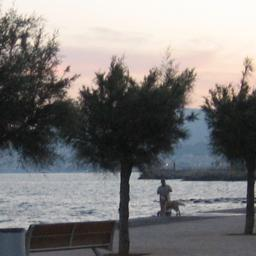

In [5]:
# displaying first image from train data
print(f"Image Class: {train_df.str_label[0]}")
print(f"Image Height: {Image.open(train_df.img_path[0]).height}")
print(f"Image Width: {Image.open(train_df.img_path[0]).width}")
Image.open(train_df.img_path[0])

Image Class: building
Image Height: 256
Image Width: 256


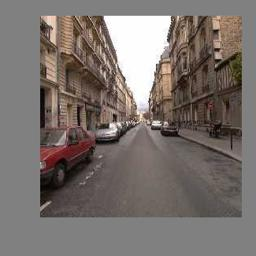

In [6]:
# displaying last image from train data
print(f"Image Class: {train_df.str_label[len(train_df)-1]}")
print(f"Image Height: {Image.open(train_df.img_path[len(train_df)-1]).height}")
print(f"Image Width: {Image.open(train_df.img_path[len(train_df)-1]).width}")
Image.open(train_df.img_path[len(train_df)-1])

Image Class: car
Image Height: 256
Image Width: 256


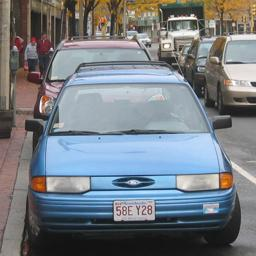

In [7]:
# displaying first image from test data
print(f"Image Class: {test_df.str_label[0]}")
print(f"Image Height: {Image.open(test_df.img_path[0]).height}")
print(f"Image Width: {Image.open(test_df.img_path[0]).width}")
Image.open(test_df.img_path[0])

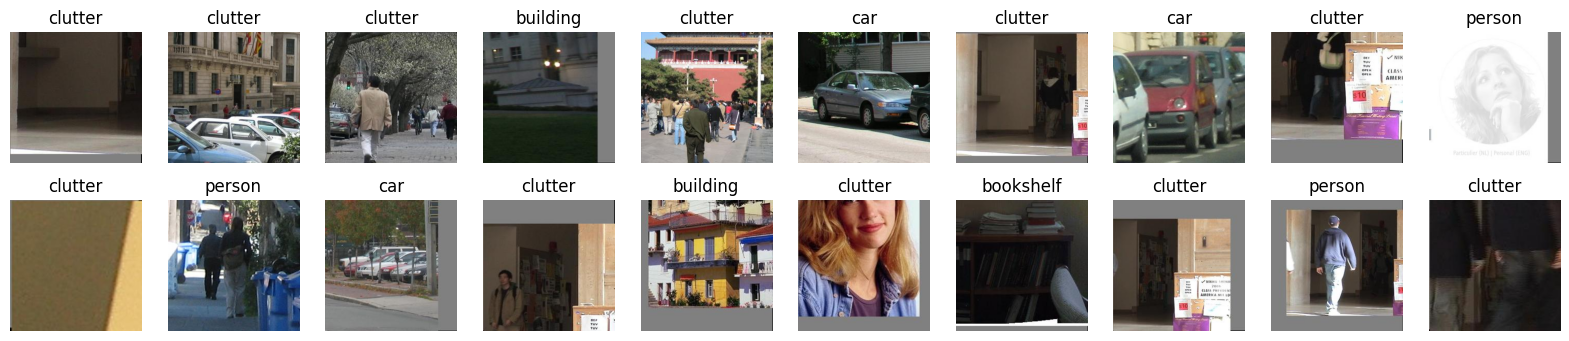

In [8]:
# displaying 10 random images from train and test data each with their class labels
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    rand_int = random.randint(0, len(train_df)-1)
    ax[0, i].imshow(Image.open(train_df.img_path[rand_int]))
    ax[0, i].set_title(train_df.str_label[rand_int])
    ax[0, i].axis("off")

    rand_int = random.randint(0, len(test_df)-1)
    ax[1, i].imshow(Image.open(test_df.img_path[rand_int]))
    ax[1, i].set_title(test_df.str_label[rand_int])
    ax[1, i].axis("off")

<Axes: xlabel='str_label'>

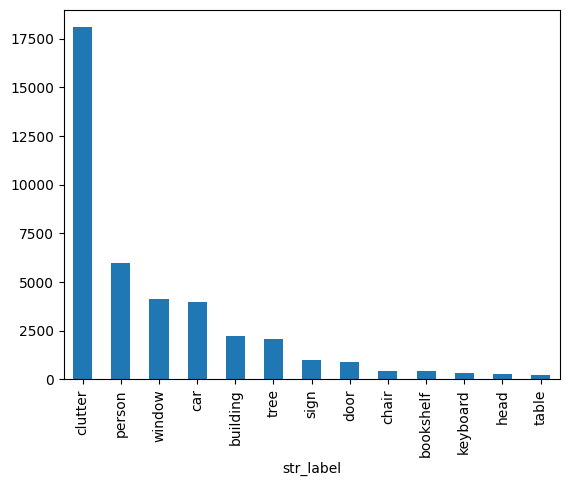

In [9]:
# plotting class distribution for train data
train_df['str_label'].value_counts().plot(kind='bar')

### 2) Creating Dataloaders

* importing necessary libraries for dataloader

In [10]:
import torch
import torchvision
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchinfo import summary

* defining class to load custom dataset

In [11]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        img = Image.open(img_path)
        label = int(self.dataframe.iloc[idx, 1])

        if self.transform:
            img = self.transform(img)

        return img, label


* defining transforms

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the desired size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])  # Normalized using ImageNet stats
])


* instantiating custom dataset for train and test data

In [13]:
train_dataset = CustomDataset(train_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

* creating dataloaders for train and test data

In [14]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [15]:
# Find the number of samples/batches per dataloader
print(f"Number of batches of size {batch_size} in training data: {len(train_loader)}")
print(f"Number of batches of size {batch_size} in testing data: {len(test_loader)}")
print(f"Number of classes: {len(class_map_s2i)}, class names: {class_map_s2i}")

Number of batches of size 32 in training data: 1250
Number of batches of size 32 in testing data: 313
Number of classes: 13, class names: {'person': 0, 'car': 1, 'building': 2, 'window': 3, 'tree': 4, 'sign': 5, 'door': 6, 'bookshelf': 7, 'chair': 8, 'table': 9, 'keyboard': 10, 'head': 11, 'clutter': 12}


### 3) Setting up device agnostic code

In [16]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 4) Defining Model

In [17]:
# Create an EffNetB2 feature extractor
def create_mobilenet_v3_small():

    # Set the manual seeds
    torch.manual_seed(42)
    torch.cuda.manual_seed(42)

    # Get the length of class_names (one output unit for each class)
    class_names = class_map_s2i.keys()
    output_shape = len(class_names)

    # 1. Get the base model with pretrained weights and send to target device
    weights = torchvision.models.MobileNet_V3_Small_Weights.DEFAULT
    model = torchvision.models.mobilenet_v3_small(weights=weights).to(device)

    # 4. Change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=576, out_features=output_shape)
    ).to(device)

    # 5. Give the model a name
    model_name = "mobilenet_v3_small"
    print(f"[INFO] Created new {model_name} model.")
    return model

In [18]:
# instantiate the model
model = create_mobilenet_v3_small()

[INFO] Created new mobilenet_v3_small model.


### 5) Training Model

In [19]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import engine

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_loader,
                       test_dataloader=test_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4352 | train_acc: 0.8595 | test_loss: 0.3538 | test_acc: 0.8929
Epoch: 2 | train_loss: 0.2653 | train_acc: 0.9149 | test_loss: 0.3341 | test_acc: 0.8944
Epoch: 3 | train_loss: 0.2113 | train_acc: 0.9296 | test_loss: 0.3287 | test_acc: 0.9062
Epoch: 4 | train_loss: 0.1780 | train_acc: 0.9405 | test_loss: 0.3304 | test_acc: 0.9071
Epoch: 5 | train_loss: 0.1451 | train_acc: 0.9501 | test_loss: 0.3151 | test_acc: 0.9093
Epoch: 6 | train_loss: 0.1257 | train_acc: 0.9559 | test_loss: 0.3124 | test_acc: 0.9138
Epoch: 7 | train_loss: 0.0992 | train_acc: 0.9635 | test_loss: 0.4049 | test_acc: 0.8989
Epoch: 8 | train_loss: 0.0906 | train_acc: 0.9686 | test_loss: 0.3407 | test_acc: 0.9118
Epoch: 9 | train_loss: 0.0728 | train_acc: 0.9737 | test_loss: 0.3905 | test_acc: 0.9154
Epoch: 10 | train_loss: 0.0706 | train_acc: 0.9752 | test_loss: 0.4308 | test_acc: 0.9067
[INFO] Total training time: 1017.143 seconds


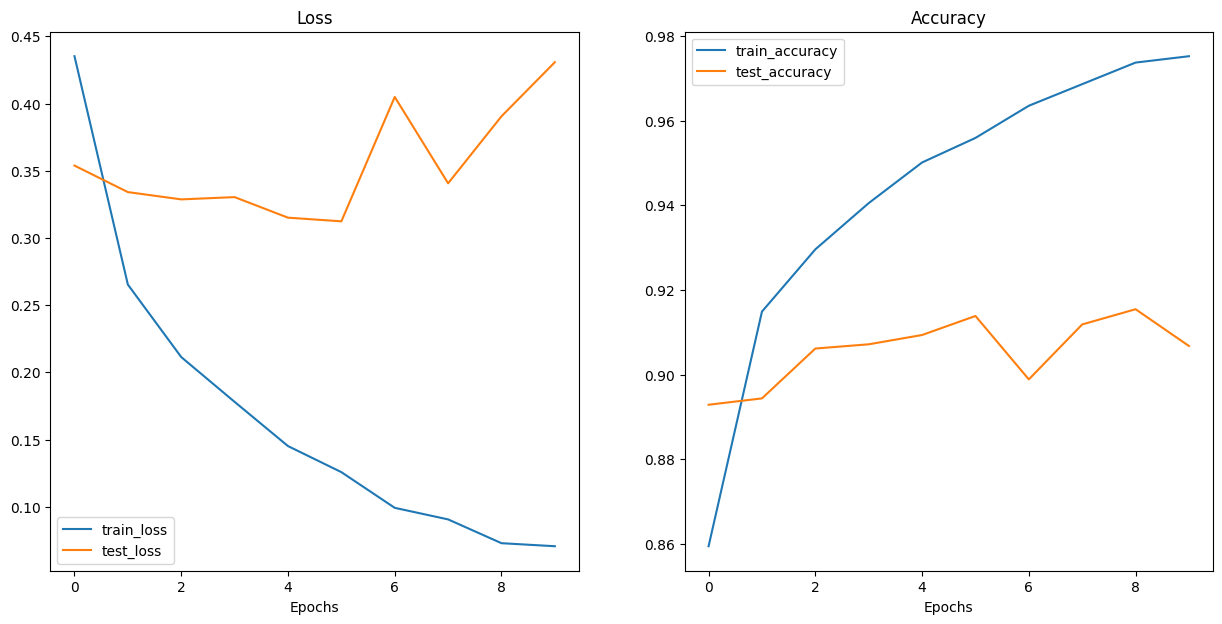

In [21]:
# Get the plot_loss_curves() function from helper_functions.py
from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [22]:
from pathlib import Path
from utils import save_model

# Save the model
save_model(model = model,
           target_dir="models",
           model_name="pretrained_MobileNet_V3_small.pth")

# Get the model size in bytes then convert to megabytes
pretrained_MobileNet_V3_small_size = Path("models/pretrained_MobileNet_V3_small.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_MobileNet_V3_small_size} MB")

[INFO] Saving model to: models\pretrained_MobileNet_V3_small.pth
Pretrained EffNetB2 feature extractor model size: 3 MB


In [23]:
# Count number of parameters in our model
MobileNet_V3_small_total_params = sum(torch.numel(param) for param in model.parameters())
MobileNet_V3_small_total_params

934509

### 6) Testing the Trained Model on Random Test Set examples

In [24]:
test_dataset = CustomDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [25]:
saved_model = create_mobilenet_v3_small().to('cpu')
saved_model.load_state_dict(torch.load("models/pretrained_MobileNet_V3_small.pth", map_location='cpu'))
saved_model.eval()

[INFO] Created new mobilenet_v3_small model.


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [26]:
import time
predictions = []
avg_prediction_time = 0.0

with torch.no_grad():
    for idx, (img_path, int_label, str_label) in enumerate(test_df[['img_path', 'int_label', 'str_label']].values):
        image = Image.open(img_path).convert('RGB')  # Load and preprocess the image
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
        start_time = time.time()  # Record start time

        # Perform inference
        output = saved_model(image_tensor)

        end_time = time.time()  # Record end time
        prediction_time = end_time - start_time
        avg_prediction_time += prediction_time

        predicted_class = torch.argmax(output, dim=1).item()
        is_correct = int(predicted_class == int_label)

        predictions.append([img_path, int_label, str_label, predicted_class, is_correct])

avg_prediction_time /= len(test_df)
print(f"Average prediction time per image: {avg_prediction_time:.4f} seconds")

predictions_df = pd.DataFrame(predictions, columns=['img_path', 'int_label', 'str_label', 'predicted_class', 'is_correct'])

Average prediction time per image: 0.0073 seconds


In [27]:
predictions_df

,img_path,int_label,str_label,predicted_class,is_correct
0,test\0000\000000.jpg,1,car,1,1
1,test\0000\000001.jpg,12,clutter,12,1
2,test\0000\000002.jpg,1,car,1,1
3,test\0000\000003.jpg,1,car,1,1
4,test\0000\000004.jpg,12,clutter,12,1
...,...,...,...,...,...
9995,test\0009\009995.jpg,12,clutter,12,1
9996,test\0009\009996.jpg,1,car,1,1
9997,test\0009\009997.jpg,2,building,4,0
9998,test\0009\009998.jpg,12,clutter,12,1


In [28]:
predictions_df.is_correct.value_counts()

is_correct
1    9068
0     932
Name: count, dtype: int64

Testing on random local image

In [29]:
from PIL import Image
import torchvision.transforms as transforms

# Load and preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_path = 'chair.jpg'
image = Image.open(image_path).convert('RGB')
image = transform(image).unsqueeze(0)  # Add batch dimension


In [30]:
with torch.no_grad():
    output = saved_model(image)


In [31]:
import torch

predicted_class = torch.argmax(output, dim=1).item()
probability = torch.softmax(output, dim=1)[0][predicted_class].item()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


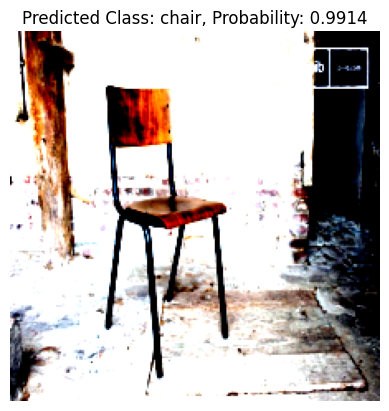

In [32]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image.squeeze(0).permute(1, 2, 0))  # Transpose to (H, W, C)
plt.title(f'Predicted Class: {class_map_i2s[predicted_class]}, Probability: {probability:.4f}')
plt.axis('off')
plt.show()

# getting class labels from "classes.txt"
with open(classes_txt_path) as file:
    class_map_s2i = {line.rstrip():i for i, line in enumerate(file.readlines()) if line.rstrip()}
class_map_i2s = {v:k for k,v in class_map_s2i.items()}

# getting labels for train data from "train/annotation.txt"
with open(train_annot_path) as file:
    train_annots = [line.rstrip().split() for line in file.readlines()]
train_img_path = [os.path.join(train_dir, "0"+train_annot[0][:3], train_annot[0]+".jpg") for train_annot in train_annots]
train_int_lbl = [np.argmax(np.array([int(ast.literal_eval(x)) for x in train_annot[1:]])) for train_annot in train_annots]
train_str_lbl = [class_map_i2s[x] for x in train_int_lbl]

# getting labels for test data from "test/annotation.txt"
with open(test_annot_path) as file:
    test_annots = [line.rstrip().split() for line in file.readlines()]
test_img_path = [os.path.join(test_dir, "0"+test_annot[0][:3], test_annot[0]+".jpg") for test_annot in test_annots]
test_int_lbl = [np.argmax(np.array([int(ast.literal_eval(x)) for x in test_annot[1:]])) for test_annot in test_annots]
test_str_lbl = [class_map_i2s[x] for x in test_int_lbl]